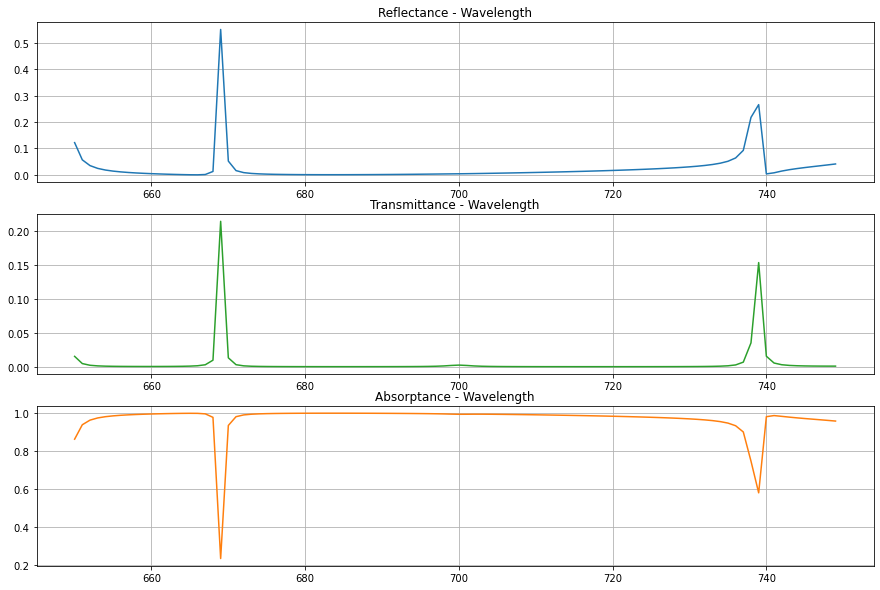

In [1]:
# H -> High Index Layer Translational Matrix
# L -> Low Index Layer Translational Matrix
# M -> Medium Index Layer Translational Matrix
# D -> Defect Layer Translational Matrix
# A -> Air Layer Inverse Dynamical Matrix
# S -> Substrate Layer Inverse Dynamical Matrix
# T -> Metal Thin Layer Inverse Dynamical Matrix
from multilayerAnalysisv1 import MultilayerAnalysis
import matplotlib.pyplot as plt
import numpy as np
designWaveLength = 700.0
thicknessDividerCoefficient = 4.0
# ----------------------You can Write your own sequence here with using the letter table above.----------------------
multilayerSequenceThue = "A(HLMLMHLMHHLMLMHHLMHLMLMH)^(2)S"
multilayerSequenceFibonacciWithMetalLayer = "AT(LHLHLLHL)^(2)D(LHLHLLHL)^(2)HS"
multilayerSequenceFibonacci = "A(LHLHLLHL)^(5)S"
multilayerSequenceTestThueFiboCombined = "A(HLLHLLHLHLLHL)^(2)(LHHLHLLHHLLHLHHL)^(1)S"
multilayerSequenceTestThueLuckyCombined = "AT(HLLHLHHLLHHLHLLH)^(1)HHLHHHHLHHLHHHLHLS"
#--My Sequence Tests
multilayerSequenceTestPisano01 = "A(LLLHHLHHLHH)^(1)S" #First Fibonacci mod8, then mod2 of Pisano Period. 1->H, 0->L.
multilayerSequenceTestPisano02 = "A(HHLHHHLLLLHLLLH)^(2)S" #First Fibonacci mod7, then mod2 of Pisano Period. 1->H, 0->L.
multilayerSequenceTestPisano03 = "A(LLLHHLHHLHH)^(2)(HHLHHHLLLLHLLLH)^(2)S" #Pisano01 and Pisano02 series combined.

# -------------------------------------------------------------------------------------------------------------------
absorptance = []
reflectance = []
transmittance = []
wavelength = np.arange(650, 750)
for wavelengthCounter in wavelength:
    instance = MultilayerAnalysis(designWaveLength, thicknessDividerCoefficient, wavelengthCounter)
    totalSystemMatrix = instance.TotalSystemMatrixCal(multilayerSequenceFibonacciWithMetalLayer)
    reflectance.append(instance.ReflectanceCal(totalSystemMatrix))
    transmittance.append(instance.TransmittanceCal(totalSystemMatrix))
    absorptance.append(instance.AbsorptanceCal(totalSystemMatrix))
fig, axs = plt.subplots(3, figsize=(15, 10))
axs[0].plot(wavelength, reflectance, 'tab:blue')
axs[1].plot(wavelength, transmittance, 'tab:green')
axs[2].plot(wavelength, absorptance,'tab:orange')
axs[0].title.set_text('Reflectance - Wavelength')
axs[1].title.set_text('Transmittance - Wavelength')
axs[2].title.set_text('Absorptance - Wavelength')
axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)
